In [84]:
import tensorflow as tf 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [85]:
df = pd.read_csv('FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [86]:
train_x = np.array(df['ENGINESIZE'])
train_y = np.array(df['CO2EMISSIONS'])

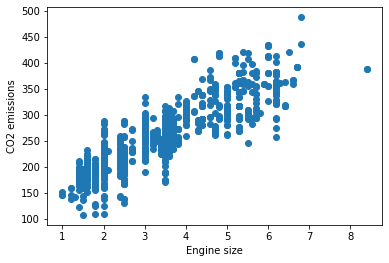

In [87]:
plt.xlabel('Engine size')
plt.ylabel('CO2 emissions')
plt.scatter(train_x, train_y)
plt.show()

In [88]:
def forward(x,w,b):
    yhat = (w * x) + b
    return yhat

In [89]:
loss_object = tf.keras.losses.MeanSquaredLogarithmicError()
epochs = 20000
lr = 0.1
loss_values = []
params = []

w = tf.Variable(20.0)
b = tf.Variable(30.0)

for epoch in range(epochs):
    with tf.GradientTape() as tape :

        yhat = forward(train_x,w,b)
        loss = loss_object(train_y,yhat)
        loss_values.append(loss.numpy())

        grads = tape.gradient(loss, [b,w])

        w.assign_sub(grads[1] * lr)
        b.assign_sub(grads[0] * lr)

        if epoch % (epochs/10) == 0 :
            params.append([w,b])

    if epoch % (epochs/10) == 0 : 
        print('Epoch : ', epoch)
        print('Loss : ', loss.numpy())

Epoch :  0
Loss :  0.9730817
Epoch :  2000
Loss :  0.50077134
Epoch :  4000
Loss :  0.3271904
Epoch :  6000
Loss :  0.23641406
Epoch :  8000
Loss :  0.18128736
Epoch :  10000
Loss :  0.14484721
Epoch :  12000
Loss :  0.1193949
Epoch :  14000
Loss :  0.100913756
Epoch :  16000
Loss :  0.08710166
Epoch :  18000
Loss :  0.07654569


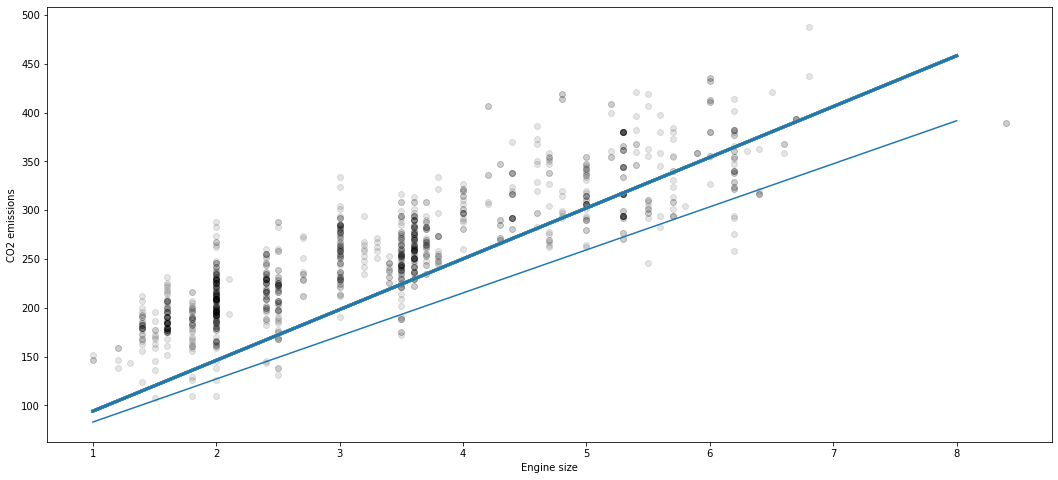

In [90]:
maximum = np.min(train_x)
vals = np.arange(float(np.min(train_x)), float(np.max(train_x)))

plt.figure(figsize = (18,8))
plt.xlabel('Engine size')
plt.ylabel('CO2 emissions')

plt.scatter(train_x, train_y, color = 'black', alpha = 0.1)
plt.plot(vals,preds)

for i in params :
    preds = forward(vals,i[0],i[1])
    plt.plot(vals,preds, linewidth = 3)

plt.show()

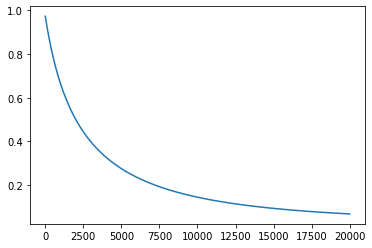

In [91]:
plt.plot(loss_values)
plt.show()